# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [12]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

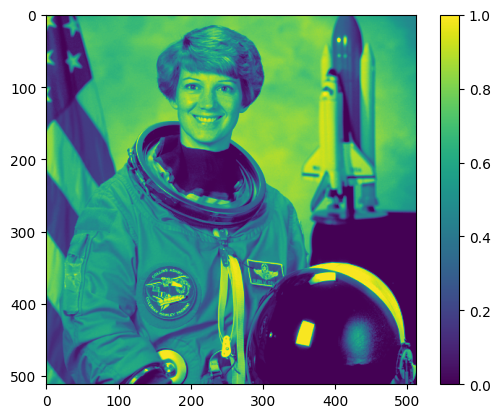

In [13]:
img=plt.imread("data/astronaut.png")
plt.imshow(img)
plt.colorbar()

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [14]:
def meanfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        neighborhood_sum = 0
        if p[0] <n or p[0]>=(img_in.shape[0]-n) or p[1] <n or p[1]>=(img_in.shape[1]-n):
            result[p]=0
        else:
            for q in numpy.ndindex(size, size):
                neighborhood_sum=neighborhood_sum+img_in[q[0]+p[0]-n,q[1]+p[1]-n]
            result[p]=neighborhood_sum/(size*size)
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

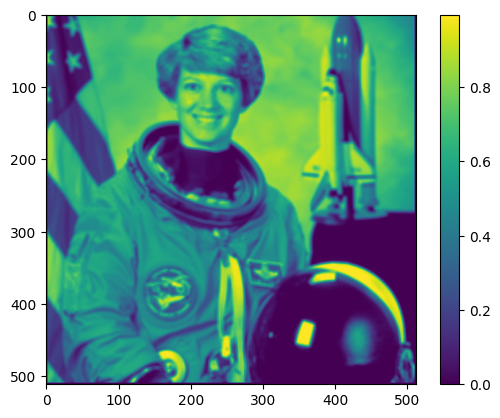

In [15]:
imgff5=meanfilter(img, 5)
plt.imshow(imgff5)
plt.colorbar()

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

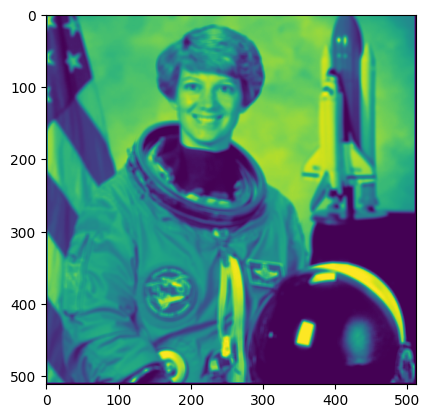

In [16]:
imgf5=plt.imread("data/astronaut_meanfilter5.png")
plt.imshow(imgf5)
assert numpy.allclose(imgf5, imgff5, atol=1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [17]:
def medianfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        neighborhood_values=0   
        if p[0] <n or p[0]>=(img_in.shape[0]-n) or p[1] <n or p[1]>=(img_in.shape[1]-n):
            result[p]=0
        else:
            for q in numpy.ndindex(size, size):
                neighborhood_values.append(img_in[q[0]+p[0]-n,q[1]+p[1]-n])
            neighborhood_values.sort()
            result[p]=neighborhood_values[(size*size)//2]
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

In [18]:
imgmed5=medianfilter(img, 5)
plt.imshow(imgmed5)
plt.colorbar()

AttributeError: 'int' object has no attribute 'append'

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

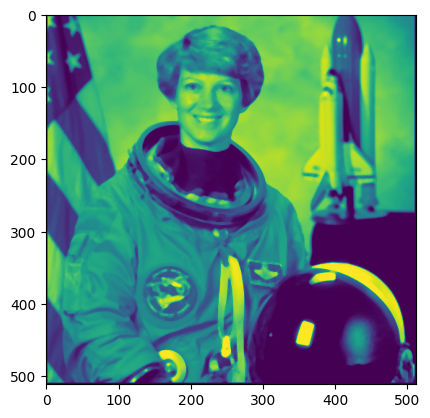

In [ ]:
imgmedfr5=plt.imread("data/astronaut_medianfilter5.png")
plt.imshow(imgmedfr5)
assert numpy.allclose(imgmed5, imgmedfr5, atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [19]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

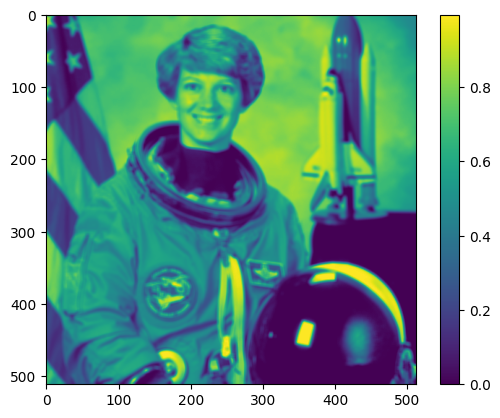

In [20]:
mean_img=scipy.ndimage.uniform_filter(img, 5)
plt.imshow(mean_img)
plt.colorbar()

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

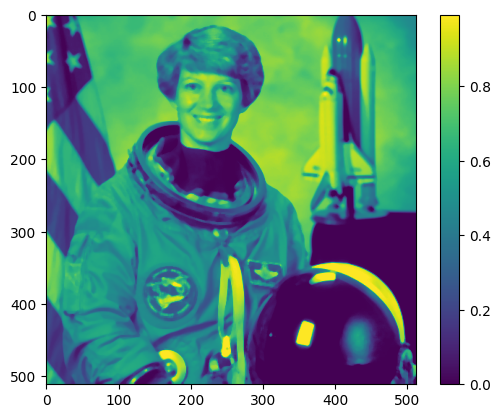

In [21]:
median_img=scipy.ndimage.median_filter(img, 5)
plt.imshow(median_img)
plt.colorbar()

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

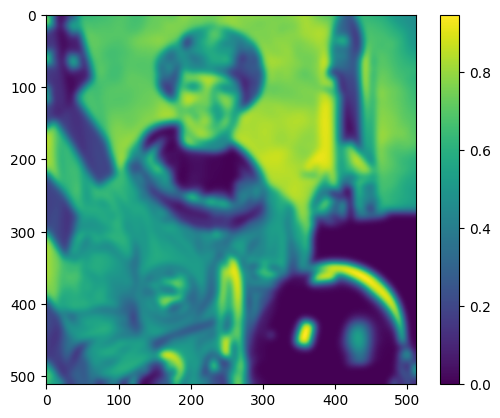

In [ ]:
gauss_img=scipy.ndimage.gaussian_filter(img, 5)
plt.imshow(gauss_img)
plt.colorbar()

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

Sie haben keinen Rand, vermutlich erweitern die Funktionen die Bilder mit 0 am Rand anstatt einfach alles pauschal 0 zu setzen

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img_in, size):
   result= numpy.zeros(img_in.shape)
   a = (size - 1) // 2
   for p in numpy.ndindex(img_in.shape):
      if p[0] <a or p[0]>=(img_in.shape[0]-a) or p[1] <a or p[1]>=(img_in.shape[1]-a):
         result[p]=0
      else:
         sub_img_in=img_in[(p[0]-a):(a+p[0]+1),(p[1]-a):(p[1]+a+1)]
         values=sub_img_in.flatten()
         values.sort()
         result[p]= values[(size*size)//2]    
   return result 

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

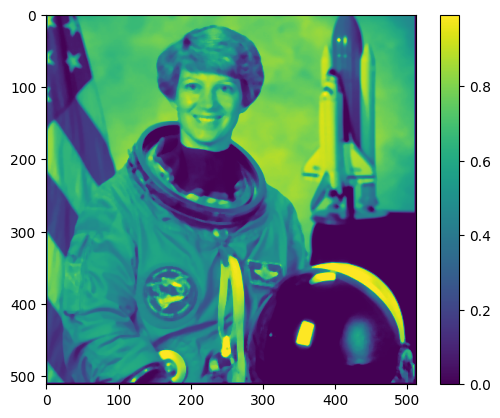

In [ ]:
img_median_ff=fastfilter(img, 5)
plt.imshow(img_median_ff)
plt.colorbar()

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

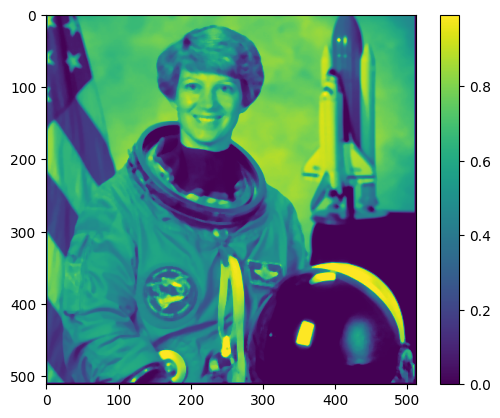

In [ ]:
img_median_sf=medianfilter(img, 5)
plt.imshow(img_median_sf)
plt.colorbar()

assert numpy.allclose(img_median_ff, img_median_sf, atol=1/255)

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

In [ ]:
%timeit fastfilter(img, 5)
%timeit medianfilter(img, 5)

797 ms ± 43.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.8 s ± 939 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation:

In [ ]:
medianfilter ist sehr viel langsamer, da es 2 loops sind statt nur eine loop in fastfilter. Deshalb: code möglichst streamlinen und wenig omplizierte Strukturen machen